# **캐글 필사**

*https://www.kaggle.com/code/sudalairajkumar/simple-exploration-notebook-instacart*

In [2]:
from google.colab import drive
drive.mount('/content/drive')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()

%matplotlib inline

pd.options.mode.chained_assignment = None    # default = 'warn'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# 파일 나열

from subprocess import check_output
print(check_output(["ls", "/content/drive/MyDrive/ESAA"]).decode("utf8"))

aisles.csv
aisles.csv.zip
departments.csv
departments.csv.zip
__MACOSX
order_products__prior.csv
order_products__prior.csv.zip
order_products__train.csv
order_products__train.csv.zip
orders.csv
orders.csv.zip
products.csv
products.csv.zip
sample_submission.csv.zip



In [4]:
import zipfile
import os

# 압축 파일 경로와 해제할 디렉토리 설정
zip_files = [
    '/content/drive/MyDrive/ESAA/order_products__train.csv.zip',
    '/content/drive/MyDrive/ESAA/order_products__prior.csv.zip',
    '/content/drive/MyDrive/ESAA/orders.csv.zip',
    '/content/drive/MyDrive/ESAA/products.csv.zip',
    '/content/drive/MyDrive/ESAA/aisles.csv.zip',
    '/content/drive/MyDrive/ESAA/departments.csv.zip'
]

output_dir = '/content/drive/MyDrive/ESAA/'

# 각 zip 파일을 순회하며 압축 해제
for zip_file in zip_files:
    with zipfile.ZipFile(zip_file, 'r') as zip_ref:
        zip_ref.extractall(output_dir)
        print(f'{zip_file} 압축 해제 완료')

/content/drive/MyDrive/ESAA/order_products__train.csv.zip 압축 해제 완료
/content/drive/MyDrive/ESAA/order_products__prior.csv.zip 압축 해제 완료
/content/drive/MyDrive/ESAA/orders.csv.zip 압축 해제 완료
/content/drive/MyDrive/ESAA/products.csv.zip 압축 해제 완료
/content/drive/MyDrive/ESAA/aisles.csv.zip 압축 해제 완료
/content/drive/MyDrive/ESAA/departments.csv.zip 압축 해제 완료


In [5]:
# 모든 파일 데이터프레임 객체로 읽고 살펴보기

order_products_train_df = pd.read_csv("/content/drive/MyDrive/ESAA/order_products__train.csv")
order_products_prior_df = pd.read_csv("/content/drive/MyDrive/ESAA/order_products__prior.csv")
orders_df = pd.read_csv("/content/drive/MyDrive/ESAA/orders.csv")
products_df = pd.read_csv("/content/drive/MyDrive/ESAA/products.csv")
aisles_df = pd.read_csv("/content/drive/MyDrive/ESAA/aisles.csv")
departments_df = pd.read_csv("/content/drive/MyDrive/ESAA/departments.csv")

In [6]:
orders_df.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [7]:
order_products_prior_df.head()

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [8]:
order_products_train_df.head()

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


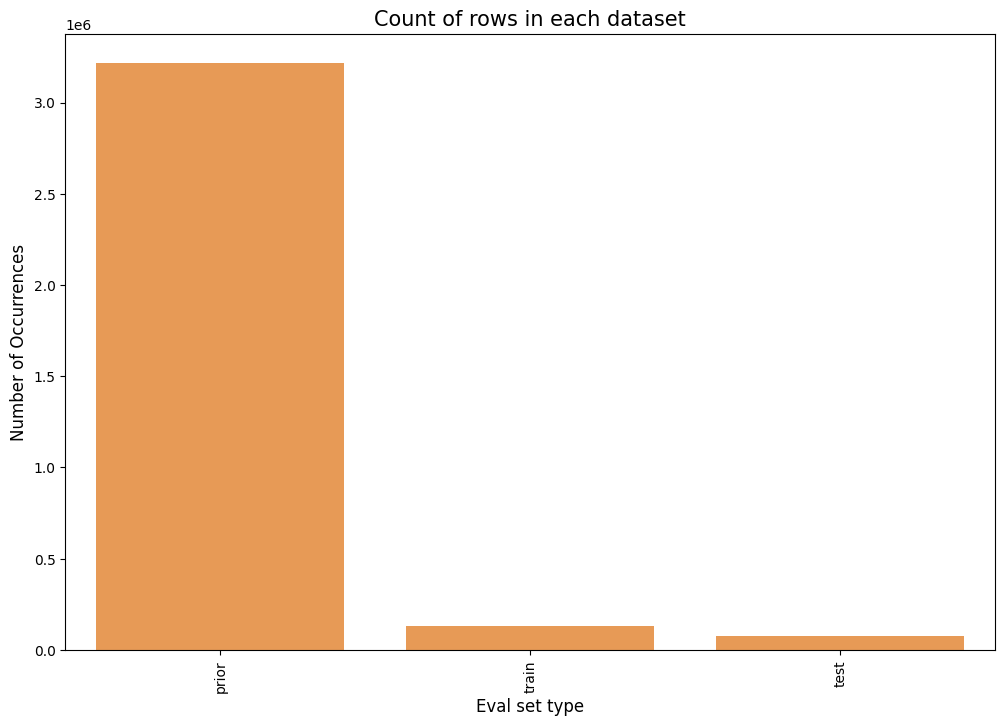

In [9]:
# 세 세트 각각의 행수 구하기

cnt_srs = orders_df.eval_set.value_counts()

plt.figure(figsize=(12,8))
sns.barplot(x = cnt_srs.index, y = cnt_srs.values, alpha=0.8, color=color[1])
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Eval set type', fontsize=12)
plt.title('Count of rows in each dataset', fontsize=15)
plt.xticks(rotation='vertical')
plt.show()

In [10]:
def get_unique_count(x):
    return len(np.unique(x))

cnt_srs = orders_df.groupby("eval_set")["user_id"].aggregate(get_unique_count)
cnt_srs

,user_id
eval_set,
prior,206209
test,75000
train,131209


- 총 206,209명의 고객 중 131,209명을 트레이닝하여 75,000명의 주문을 예측한다.

<ipython-input-11-8cce75de4b91>:3: FutureWarning: The provided callable <function max at 0x7dbe2d2939a0> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  cnt_srs = orders_df.groupby("user_id")["order_number"].aggregate(np.max).reset_index()


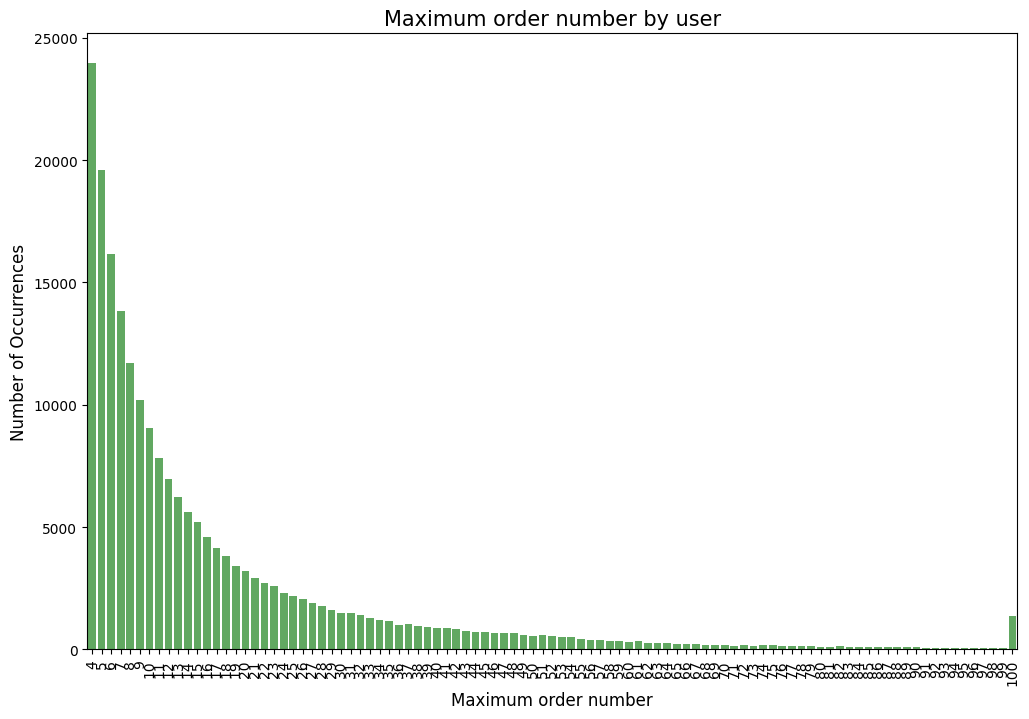

In [11]:
# 범위가 4~100임을 증명

cnt_srs = orders_df.groupby("user_id")["order_number"].aggregate(np.max).reset_index()
cnt_srs = cnt_srs.order_number.value_counts()

plt.figure(figsize=(12,8))
sns.barplot(x = cnt_srs.index, y = cnt_srs.values, alpha=0.8, color=color[2])
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Maximum order number', fontsize=12)
plt.title('Maximum order number by user', fontsize=15)
plt.xticks(rotation='vertical')
plt.show()

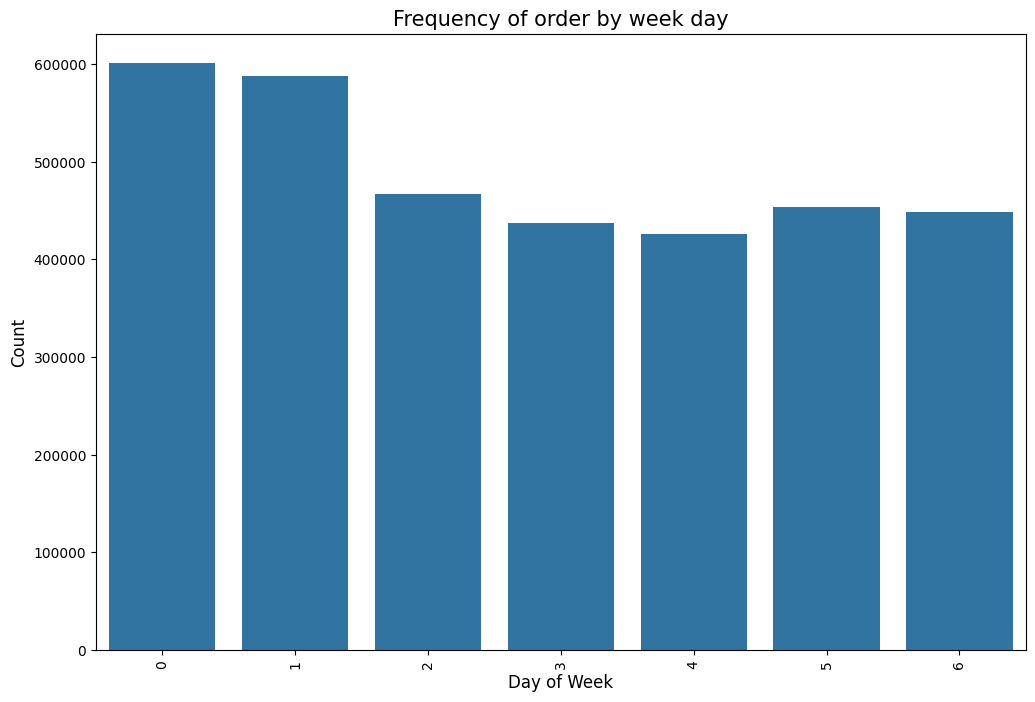

In [12]:
# 요일에 따른 주문 변화 살펴보기

plt.figure(figsize=(12,8))
sns.countplot(x='order_dow', data=orders_df, color=color[0])
plt.ylabel('Count', fontsize=12)
plt.xlabel('Day of Week', fontsize=12)
plt.xticks(rotation='vertical')
plt.title('Frequency of order by week day', fontsize=15)
plt.show()

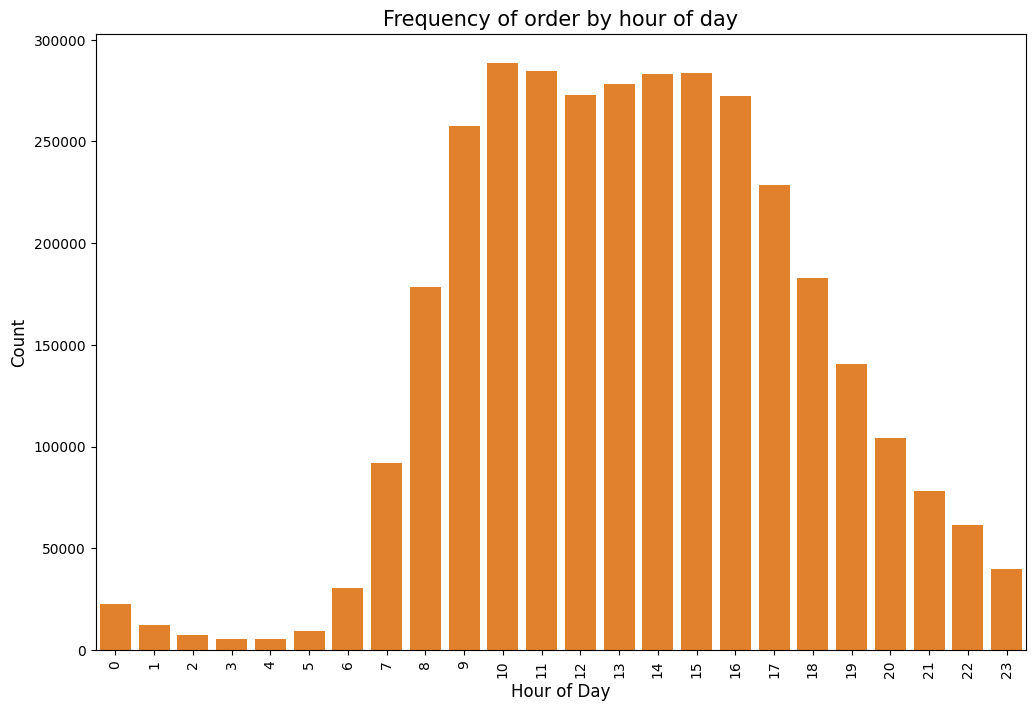

In [13]:
# 시간에 따른 분포 살펴보기

plt.figure(figsize=(12,8))
sns.countplot(x='order_hour_of_day', data=orders_df, color=color[1])
plt.ylabel('Count', fontsize=12)
plt.xlabel('Hour of Day', fontsize=12)
plt.xticks(rotation='vertical')
plt.title('Frequency of order by hour of day', fontsize=15)
plt.show()

- 대부분의 주문은 낮시간에 이루어진다.

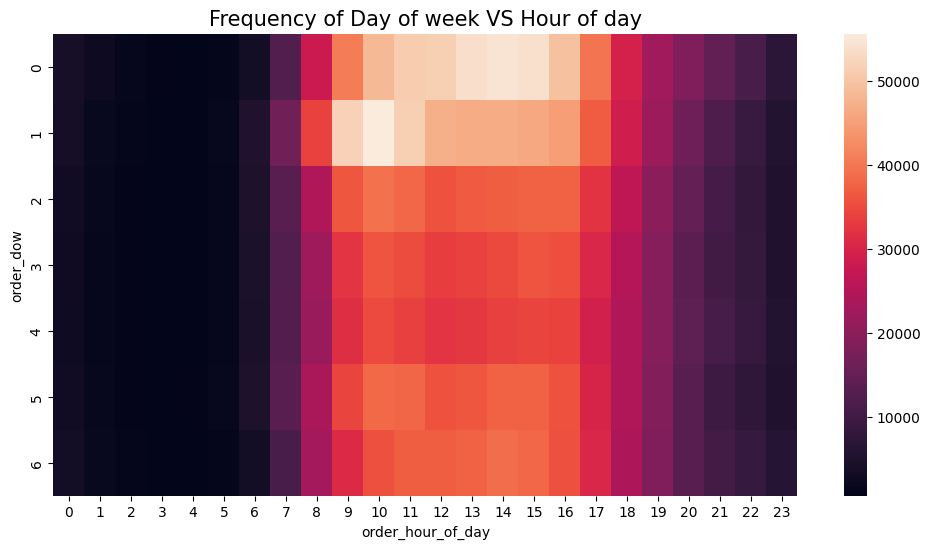

In [14]:
# 요일과 시간 결합해서 살펴보기

grouped_df = orders_df.groupby(["order_dow", "order_hour_of_day"])["order_number"].aggregate("count").reset_index()
grouped_df = grouped_df.pivot(index='order_dow', columns='order_hour_of_day', values='order_number')

plt.figure(figsize=(12,6))
sns.heatmap(grouped_df)
plt.title("Frequency of Day of week VS Hour of day", fontsize=15)
plt.show()

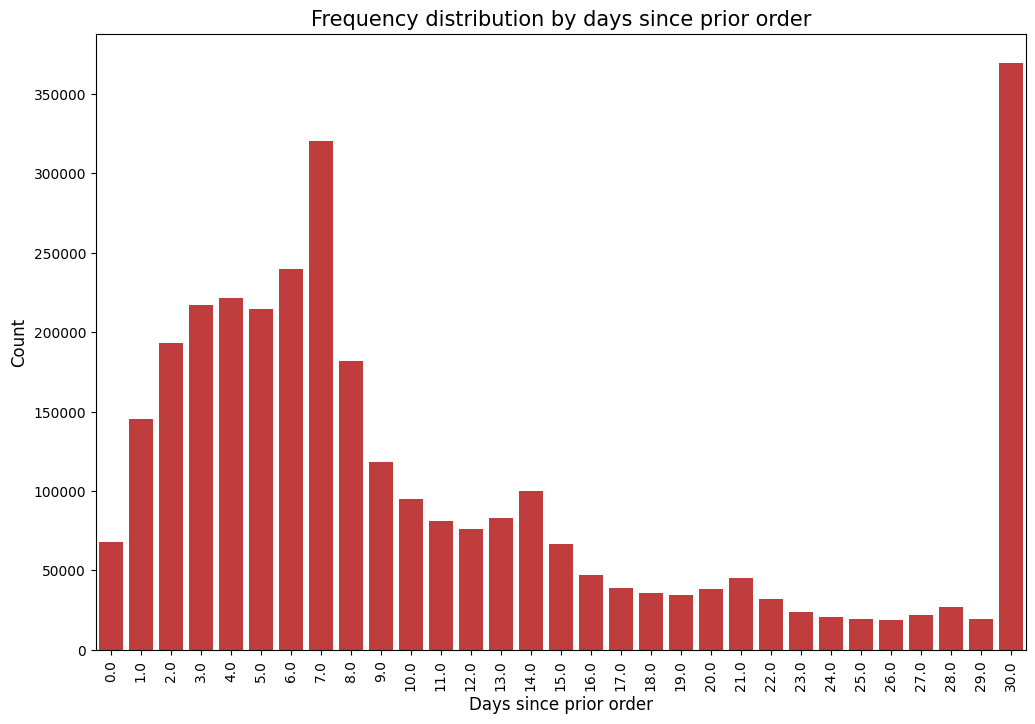

In [15]:
# 주문 사이의 시간 간격 확인

plt.figure(figsize=(12,8))
sns.countplot(x="days_since_prior_order", data=orders_df, color=color[3])
plt.ylabel('Count', fontsize=12)
plt.xlabel('Days since prior order', fontsize=12)
plt.xticks(rotation='vertical')
plt.title("Frequency distribution by days since prior order", fontsize=15)
plt.show()

In [16]:
# percentage of re-orders in prior set #
order_products_prior_df.reordered.sum() / order_products_prior_df.shape[0]

0.5896974667922161

In [17]:
# percentage of re-orders in train set #
order_products_train_df.reordered.sum() / order_products_train_df.shape[0]

0.5985944127509629

In [18]:
# 재주문되지 않은 제품

grouped_df = order_products_prior_df.groupby("order_id")["reordered"].aggregate("sum").reset_index()
grouped_df["reordered"].loc[grouped_df["reordered"]>1] = 1
grouped_df.reordered.value_counts() / grouped_df.shape[0]

,count
reordered,
1,0.879151
0,0.120849


In [19]:
grouped_df = order_products_train_df.groupby("order_id")["reordered"].aggregate("sum").reset_index()
grouped_df["reordered"].loc[grouped_df["reordered"]>1] = 1
grouped_df.reordered.value_counts() / grouped_df.shape[0]

,count
reordered,
1,0.93444
0,0.06556


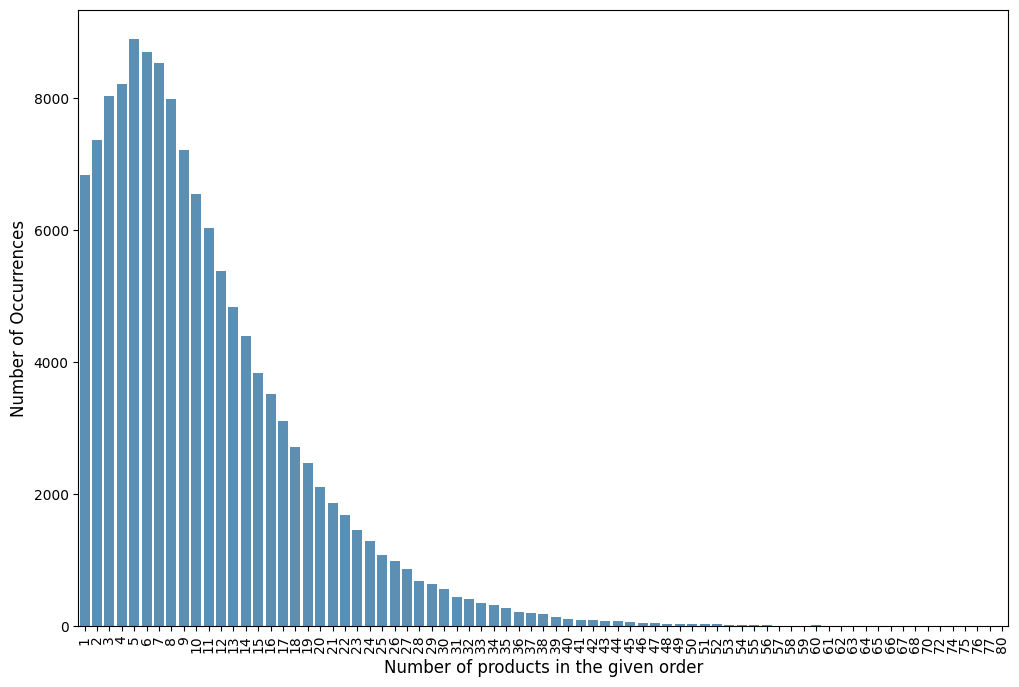

In [20]:
grouped_df = order_products_train_df.groupby("order_id")["add_to_cart_order"].aggregate("max").reset_index()
cnt_srs = grouped_df.add_to_cart_order.value_counts()

plt.figure(figsize=(12,8))
sns.barplot(x=cnt_srs.index, y=cnt_srs.values, alpha=0.8)
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Number of products in the given order', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()

In [21]:
products_df.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [22]:
aisles_df.head()

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [23]:
departments_df.head()

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [24]:
# 제품 세부정보를 order_prior와 병합

order_products_prior_df = pd.merge(order_products_prior_df, products_df, on='product_id', how='left')
order_products_prior_df = pd.merge(order_products_prior_df, aisles_df, on='aisle_id', how='left')
order_products_prior_df = pd.merge(order_products_prior_df, departments_df, on='department_id', how='left')
order_products_prior_df.head()

,order_id,product_id,add_to_cart_order,reordered,product_name,aisle_id,department_id,aisle,department
0,2,33120,1,1,Organic Egg Whites,86,16,eggs,dairy eggs
1,2,28985,2,1,Michigan Organic Kale,83,4,fresh vegetables,produce
2,2,9327,3,0,Garlic Powder,104,13,spices seasonings,pantry
3,2,45918,4,1,Coconut Butter,19,13,oils vinegars,pantry
4,2,30035,5,0,Natural Sweetener,17,13,baking ingredients,pantry


In [25]:
cnt_srs = order_products_prior_df['product_name'].value_counts().reset_index().head(20)
cnt_srs.columns = ['product_name', 'frequency_count']
cnt_srs

,product_name,frequency_count
0,Banana,472565
1,Bag of Organic Bananas,379450
2,Organic Strawberries,264683
3,Organic Baby Spinach,241921
4,Organic Hass Avocado,213584
5,Organic Avocado,176815
6,Large Lemon,152657
7,Strawberries,142951
8,Limes,140627
9,Organic Whole Milk,137905


- 대부분이 유기농, 대부분이 과일

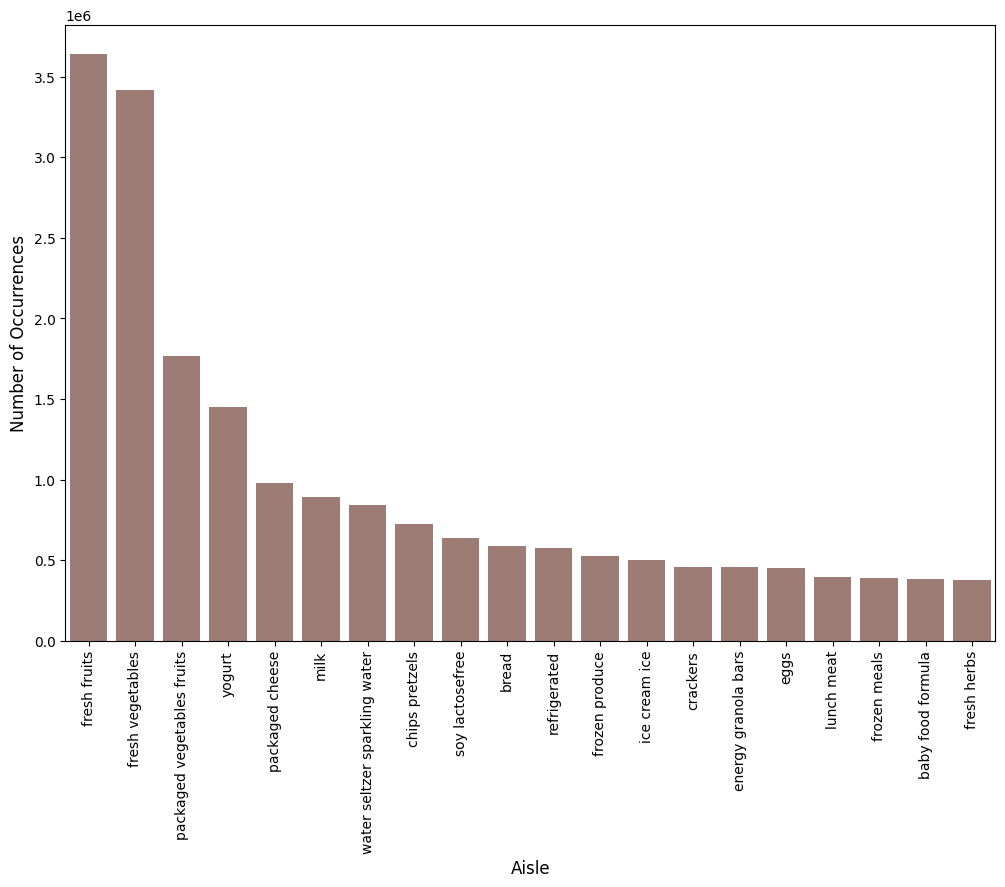

In [26]:
cnt_srs = order_products_prior_df['aisle'].value_counts().head(20)
plt.figure(figsize=(12,8))
sns.barplot(x=cnt_srs.index, y=cnt_srs.values, alpha=0.8, color=color[5])
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Aisle', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()

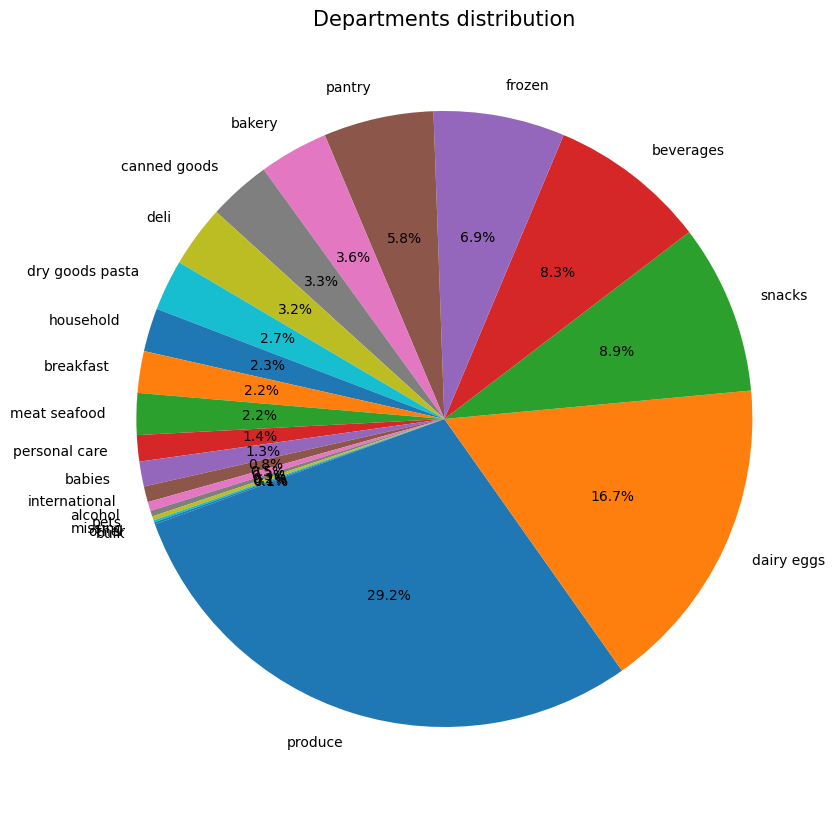

In [27]:
# 부서 별 분포

plt.figure(figsize=(10,10))
temp_series = order_products_prior_df['department'].value_counts()
labels = (np.array(temp_series.index))
sizes = (np.array((temp_series / temp_series.sum())*100))
plt.pie(sizes, labels=labels,
        autopct='%1.1f%%', startangle=200)
plt.title("Departments distribution", fontsize=15)
plt.show()

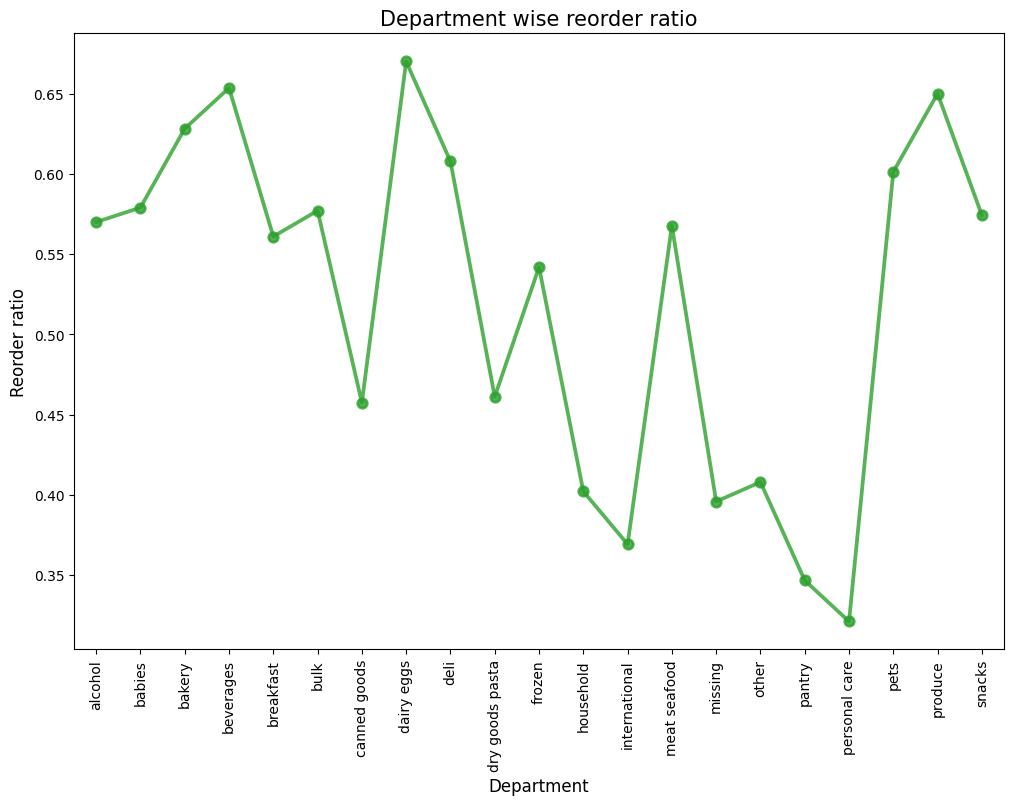

In [28]:
# 부서 별 재주문 비율

grouped_df = order_products_prior_df.groupby(["department"])["reordered"].aggregate("mean").reset_index()

plt.figure(figsize=(12,8))
sns.pointplot(x=grouped_df['department'].values, y=grouped_df['reordered'].values, alpha=0.8, color=color[2])
plt.ylabel('Reorder ratio', fontsize=12)
plt.xlabel('Department', fontsize=12)
plt.title("Department wise reorder ratio", fontsize=15)
plt.xticks(rotation='vertical')
plt.show()

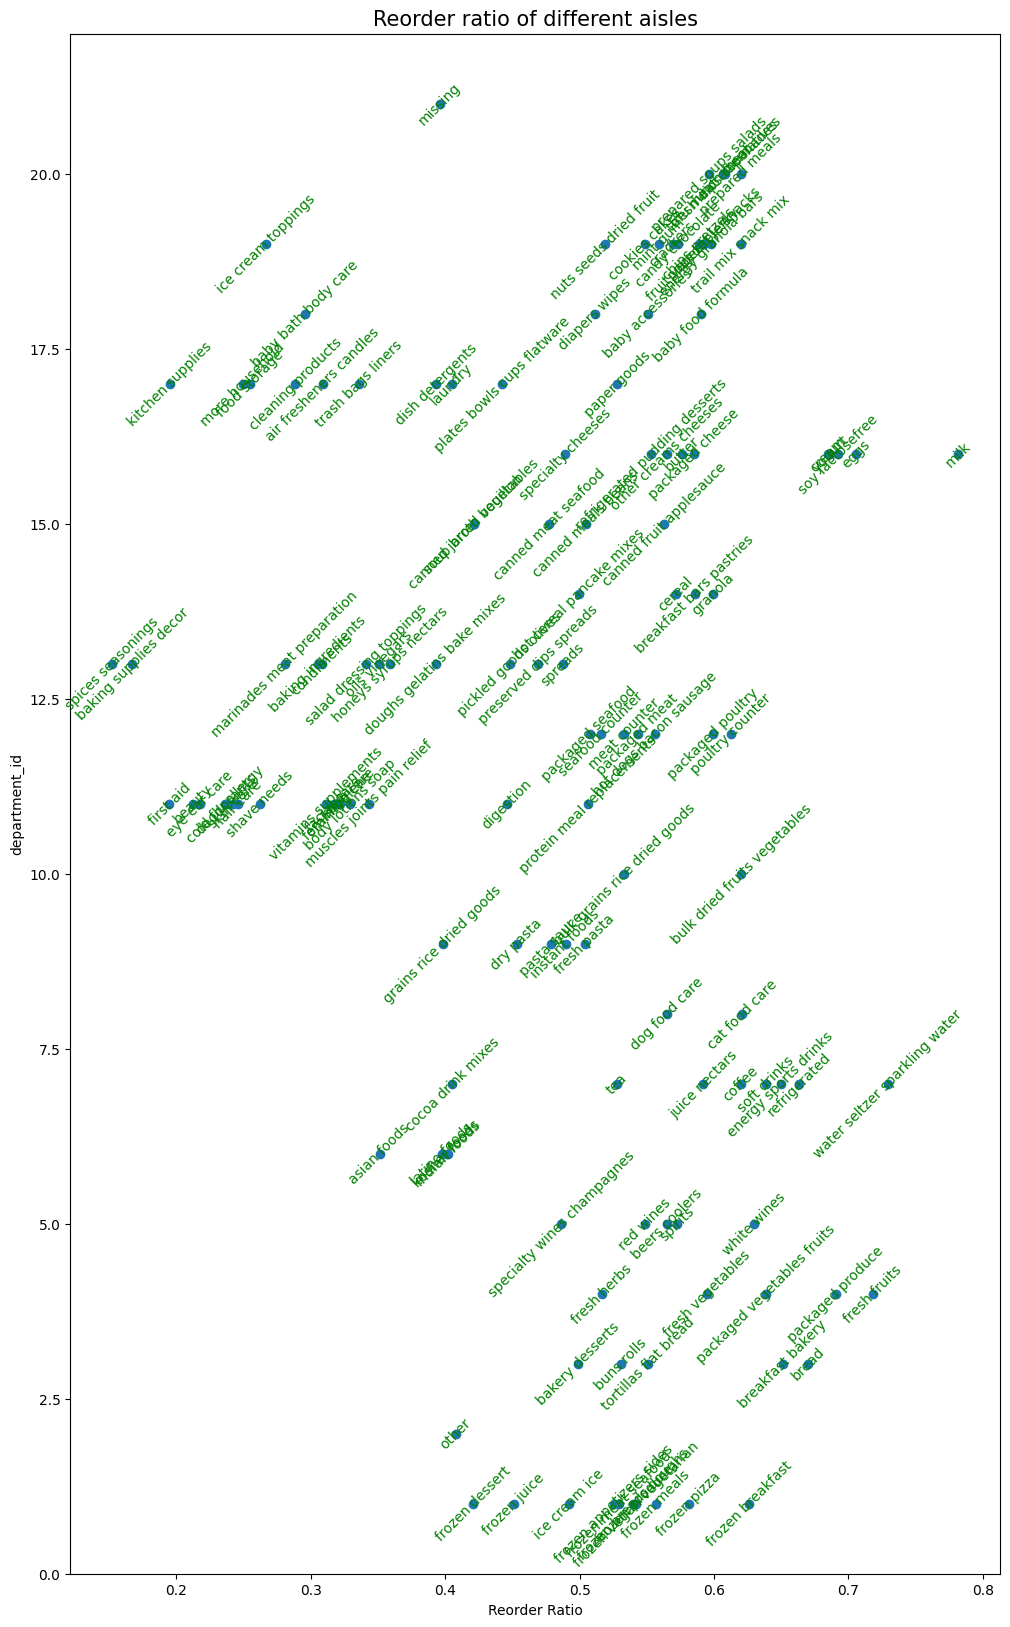

In [29]:
grouped_df = order_products_prior_df.groupby(["department_id", "aisle"])["reordered"].aggregate("mean").reset_index()

fig, ax = plt.subplots(figsize=(12,20))
ax.scatter(grouped_df.reordered.values, grouped_df.department_id.values)
for i, txt in enumerate(grouped_df.aisle.values):
    ax.annotate(txt, (grouped_df.reordered.values[i], grouped_df.department_id.values[i]), rotation=45, ha='center', va='center', color='green')
plt.xlabel('Reorder Ratio')
plt.ylabel('department_id')
plt.title("Reorder ratio of different aisles", fontsize=15)
plt.show()

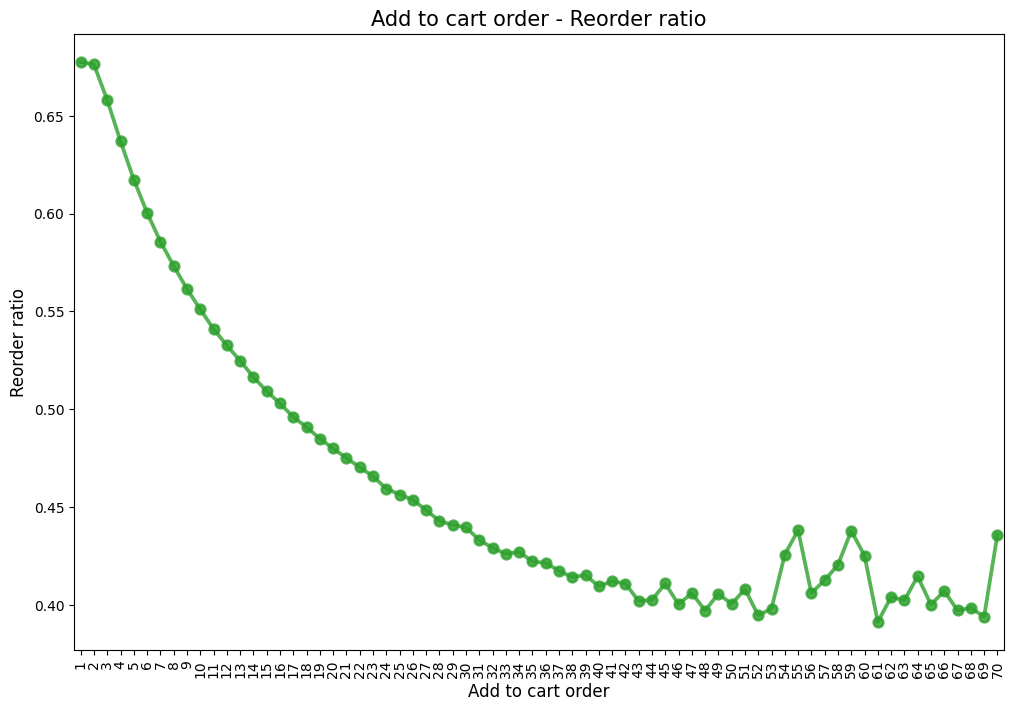

In [30]:
# 장바구니에 담는 순서와 재주문 비율의 관계

order_products_prior_df["add_to_cart_order_mod"] = order_products_prior_df["add_to_cart_order"].copy()
order_products_prior_df["add_to_cart_order_mod"].loc[order_products_prior_df["add_to_cart_order_mod"]>70] = 70
grouped_df = order_products_prior_df.groupby(["add_to_cart_order_mod"])["reordered"].aggregate("mean").reset_index()

plt.figure(figsize=(12,8))
sns.pointplot(x=grouped_df['add_to_cart_order_mod'].values, y=grouped_df['reordered'].values, alpha=0.8, color=color[2])
plt.ylabel('Reorder ratio', fontsize=12)
plt.xlabel('Add to cart order', fontsize=12)
plt.title("Add to cart order - Reorder ratio", fontsize=15)
plt.xticks(rotation='vertical')
plt.show()

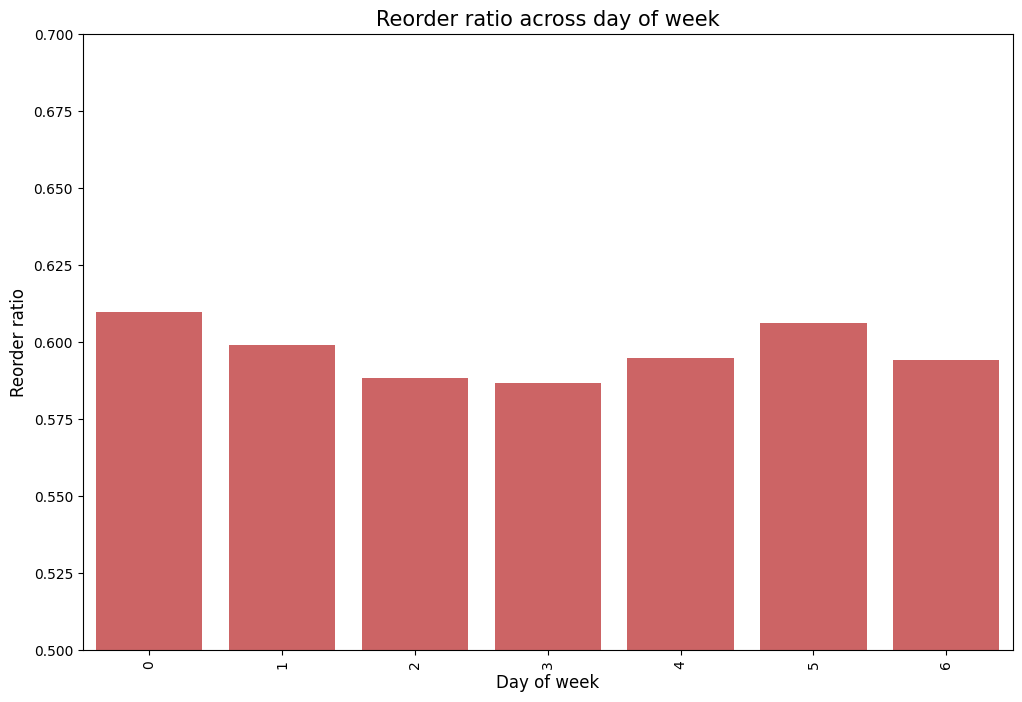

In [31]:
# 시간 기반 변수에 따른 재주문 비율

order_products_train_df = pd.merge(order_products_train_df, orders_df, on='order_id', how='left')
grouped_df = order_products_train_df.groupby(["order_dow"])["reordered"].aggregate("mean").reset_index()

plt.figure(figsize=(12,8))
sns.barplot(x=grouped_df['order_dow'].values, y=grouped_df['reordered'].values, alpha=0.8, color=color[3])
plt.ylabel('Reorder ratio', fontsize=12)
plt.xlabel('Day of week', fontsize=12)
plt.title("Reorder ratio across day of week", fontsize=15)
plt.xticks(rotation='vertical')
plt.ylim(0.5, 0.7)
plt.show()

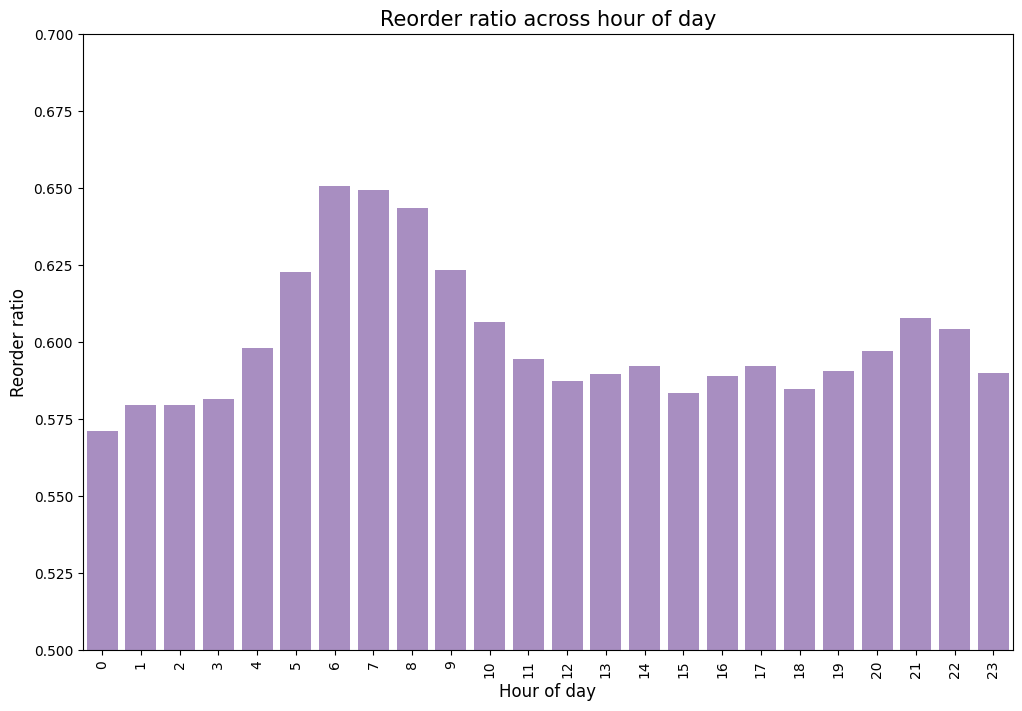

In [32]:
grouped_df = order_products_train_df.groupby(["order_hour_of_day"])["reordered"].aggregate("mean").reset_index()

plt.figure(figsize=(12, 8))
sns.barplot(x=grouped_df['order_hour_of_day'], y=grouped_df['reordered'], color=color[4])
[bar.set_alpha(0.8) for bar in plt.gca().patches]
plt.ylabel('Reorder ratio', fontsize=12)
plt.xlabel('Hour of day', fontsize=12)
plt.title("Reorder ratio across hour of day", fontsize=15)
plt.xticks(rotation='vertical')
plt.ylim(0.5, 0.7)
plt.show()

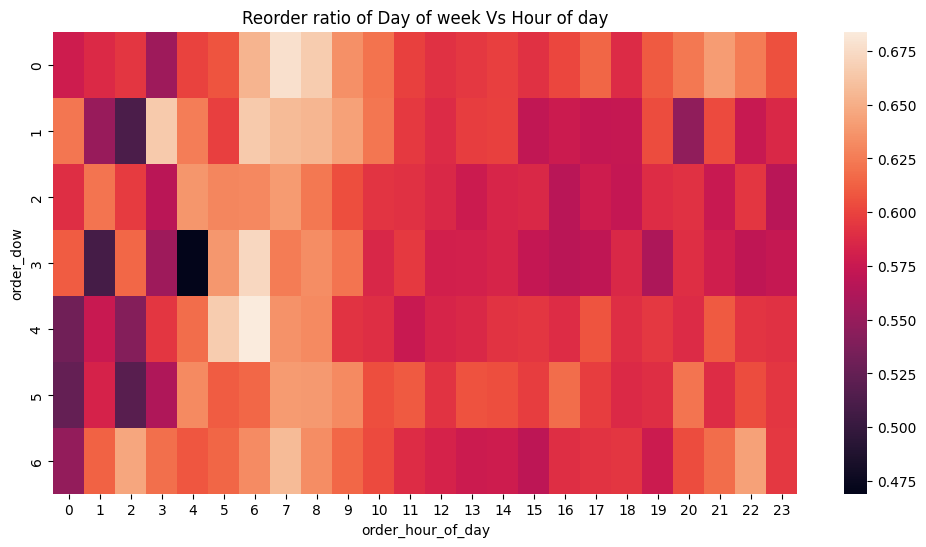

In [33]:
grouped_df = order_products_train_df.groupby(["order_dow", "order_hour_of_day"])["reordered"].aggregate("mean").reset_index()
grouped_df = grouped_df.pivot_table(index='order_dow', columns='order_hour_of_day', values='reordered', fill_value=0)

plt.figure(figsize=(12,6))
sns.heatmap(grouped_df)
plt.title("Reorder ratio of Day of week Vs Hour of day")
plt.show()

- 오후 시간에 비해 이른 아침에 재주문율이 높다.

# **새로운 전처리&시각화**

<ipython-input-34-0ffc817e43b2>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='department', y='order_id', data=top_departments, palette='Set3')


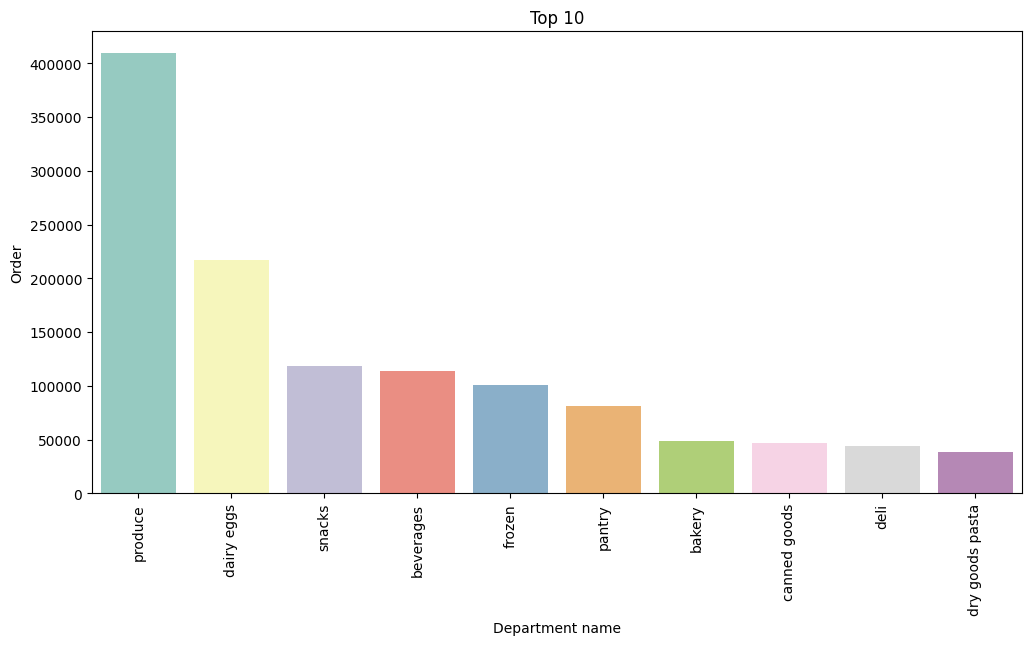

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. 데이터 병합: 제품과 부서 정보 병합
product_department = products_df.merge(departments_df, on='department_id')

# 2. 주문 데이터와 병합하여 부서 정보 추가
order_product_dept = order_products_train_df.merge(product_department, on='product_id')

# 3. 부서별 총 주문 횟수 계산
dept_order_counts = order_product_dept.groupby('department')['order_id'].count().reset_index()

# 4. 주문 수가 가장 많은 상위 10개 부서 추출
top_departments = dept_order_counts.sort_values('order_id', ascending=False).head(10)

# 5. 시각화
plt.figure(figsize=(12,6))
sns.barplot(x='department', y='order_id', data=top_departments, palette='Set3')

plt.title('Top 10')
plt.xlabel('Department name')
plt.ylabel('Order')
plt.xticks(rotation=90)
plt.show()

- 주문량이 많은 10개 부서를 뽑아 bar chart로 표시하여 시각화하였다.
- produce, dairy eggs, snacks 부서가 가장 주문량이 많은 상위 3개 부서임을 알 수 있다.